In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, HISTORICAL_DB_KEEP_OUT, RESOURCE_DIR

In [31]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,PROJECTS,COMMITS,Virtuoso-NoSql,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,Ignite-NoSql,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,Ignite-Sql,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd
0,Activiti,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Activiti,2,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,Activiti,3,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,Activiti,4,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,Activiti,5,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


Combining the heuristics of Multimodel DBs (Ignite and Virtuoso)

In [32]:
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
#df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
#df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] +  df["Virtuoso-Sql"]
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]
df

,PROJECTS,COMMITS,Virtuoso-NoSql,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,Ignite-NoSql,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,Ignite-Sql,...,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3166,maxwell,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3167,maxwell,8,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3168,maxwell,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Deleting the heuristics of the Bd Multimodels that were alone 

In [33]:
df2 = df
df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql", #"MarkLogic","MarkLogic-Sql","MarkLogic-NoSql",
"Virtuoso","Virtuoso-Sql","Virtuoso-NoSql"], axis=1, inplace=True)
df2

,PROJECTS,COMMITS,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,FileMaker,Singlestore,Riak KV,...,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3166,maxwell,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3167,maxwell,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3168,maxwell,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Renaming the Multimodel DB heuristics 

In [34]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,PROJECTS,COMMITS,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,FileMaker,Singlestore,Riak KV,...,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3166,maxwell,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3167,maxwell,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3168,maxwell,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Generating the file with all the BD heuristics including the Multimodel BD combinations 

In [35]:
HISTORICAL_FILE_JOIN = RESOURCE_DIR + os.sep + 'historical_join.xlsx'
df.to_excel(HISTORICAL_FILE_JOIN, index=False)
#df2 = df2.to_excel("historical_join.xlsx", index=False)

In [36]:
df

,PROJECTS,COMMITS,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,FileMaker,Singlestore,Riak KV,...,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3166,maxwell,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3167,maxwell,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3168,maxwell,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of commits that showed evidence of use by database

In [37]:
#df
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL_Maria DB                                836
H2                                            558
PostgreSQL_ CockroachDB                       538
Oracle                                        429
HyperSQL                                      398
Redis                                         365
MS SQL Server_Microsoft Azure SQL Database    242
SQLite                                        236
MongoDB                                       216
IBM DB2                                       178
Google Cloud Datastore                        144
SAP SQL Anywhere                              121
HBase                                         118
SAP Adaptive Server                           115
Cassandra                                     110
DynamoDB                                      106
Hazelcast                                      92
Firebase Realtime                              76
Informix                                       69
MS Access                                      64


In [38]:
#Teste para encontrar repos com o mesmo nome
#dfnomes = df['PROJECTS'].unique()
#dfnomes = pd.DataFrame(data=dfnomes)
#dfnomes
#dfnomes.to_excel('nomes_historical_join_new.xlsx', index=False)
selecao = df['PROJECTS'].str.startswith('android')
dfteste = df[selecao]
dfteste
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#df_mer= pd.merge(dfnomes, df, on= 'PROJECTS', how='outer', suffixes=['', '_'], indicator=True)
#df_mer
#df_mer.to_excel('compara_nomes_projects.xlsx',index=True)
#duplicados = df.duplicated()
#duplicados.sum()
#dfnomes = pd.DataFrame(data=duplicados)

,PROJECTS,COMMITS,Microsoft Azure Table Storage,MySQL_Maria DB,HyperSQL,MarkLogic,MS SQL Server_Microsoft Azure SQL Database,FileMaker,Singlestore,Riak KV,...,ClickHouse,Vertica,Teradata,PostgreSQL_ CockroachDB,PostGIS,Etcd,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
800,android,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,android,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,android,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,android,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,android,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
805,android,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,android,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,android,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,android,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
809,android,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df2 = df.groupby("PROJECTS").sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df3 = df2.iloc[: , 1:]
df4 = df3.T
df4

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wire,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MySQL_Maria DB,6,0,0,0,0,0,0,0,1,10,...,0,0,0,10,7,0,8,9,1,0
HyperSQL,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
MarkLogic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MS SQL Server_Microsoft Azure SQL Database,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,1,0,0,0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Singlestore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,1,8,0,0,0
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of Projects in which there was evidence of use by Database 

In [40]:
def num_missing(x):
   return sum(x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)

MySQL_Maria DB                                112
H2                                             86
PostgreSQL_ CockroachDB                        79
Redis                                          71
Oracle                                         70
HyperSQL                                       60
MS SQL Server_Microsoft Azure SQL Database     42
SQLite                                         39
MongoDB                                        36
Google Cloud Datastore                         26
IBM DB2                                        25
DynamoDB                                       22
Hazelcast                                      19
HBase                                          19
Cassandra                                      19
SAP SQL Anywhere                               19
SAP Adaptive Server                            18
Firebase Realtime                              15
Informix                                       10
Snowflake                                      10


In [41]:
df4['SumperDatabase'] = df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)
df4

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
MySQL_Maria DB,6,0,0,0,0,0,0,0,1,10,...,0,0,10,7,0,8,9,1,0,112
HyperSQL,2,0,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,60
MarkLogic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
MS SQL Server_Microsoft Azure SQL Database,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,1,0,0,0,42
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Singlestore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,1,8,0,0,0,71
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


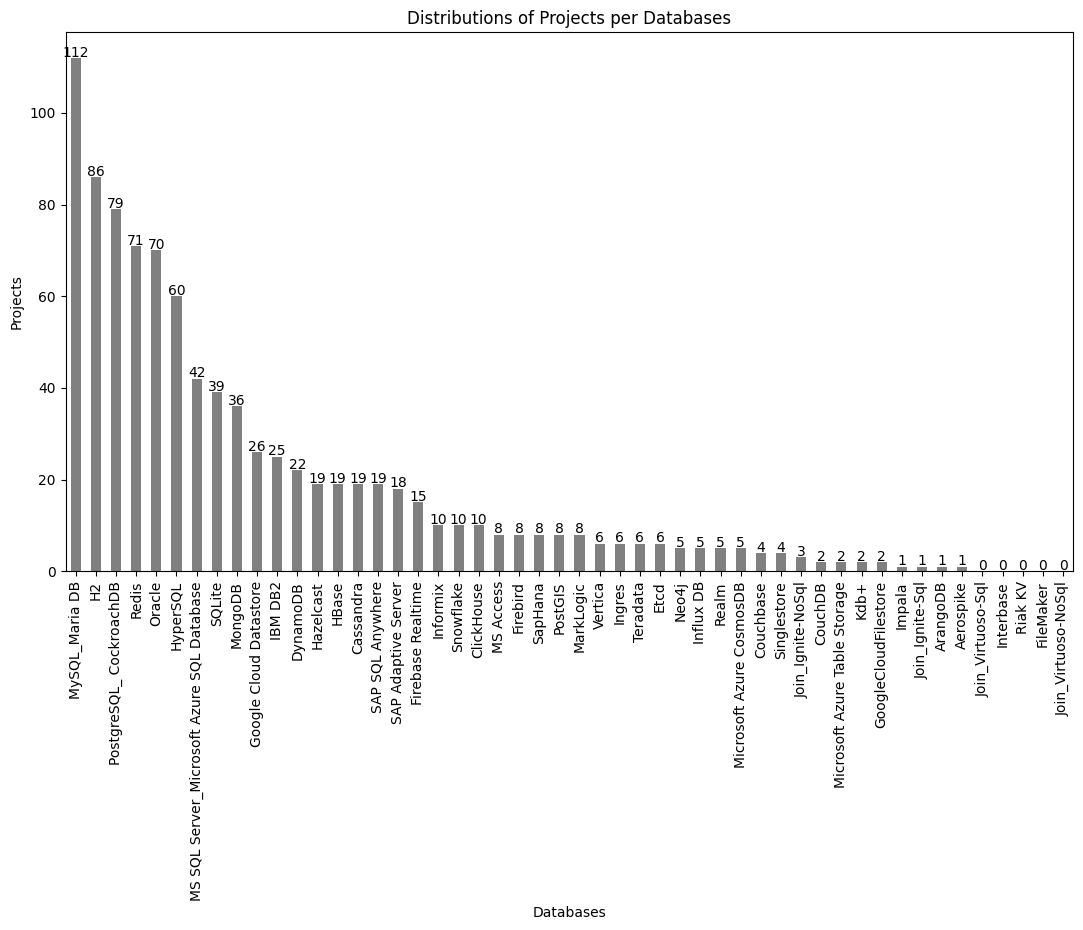

In [42]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was indication of use in all versions of the project by Database

In [43]:
def full_commits(x):
   return sum(x == 10)
df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False)

MySQL_Maria DB                                43
H2                                            23
Oracle                                        20
PostgreSQL_ CockroachDB                       20
HyperSQL                                      14
Redis                                         10
IBM DB2                                        8
Google Cloud Datastore                         6
SQLite                                         6
MS SQL Server_Microsoft Azure SQL Database     6
MongoDB                                        6
Cassandra                                      4
MS Access                                      4
HBase                                          3
SAP Adaptive Server                            3
SAP SQL Anywhere                               3
Firebird                                       3
Informix                                       3
Firebase Realtime                              2
Hazelcast                                      2
ClickHouse          

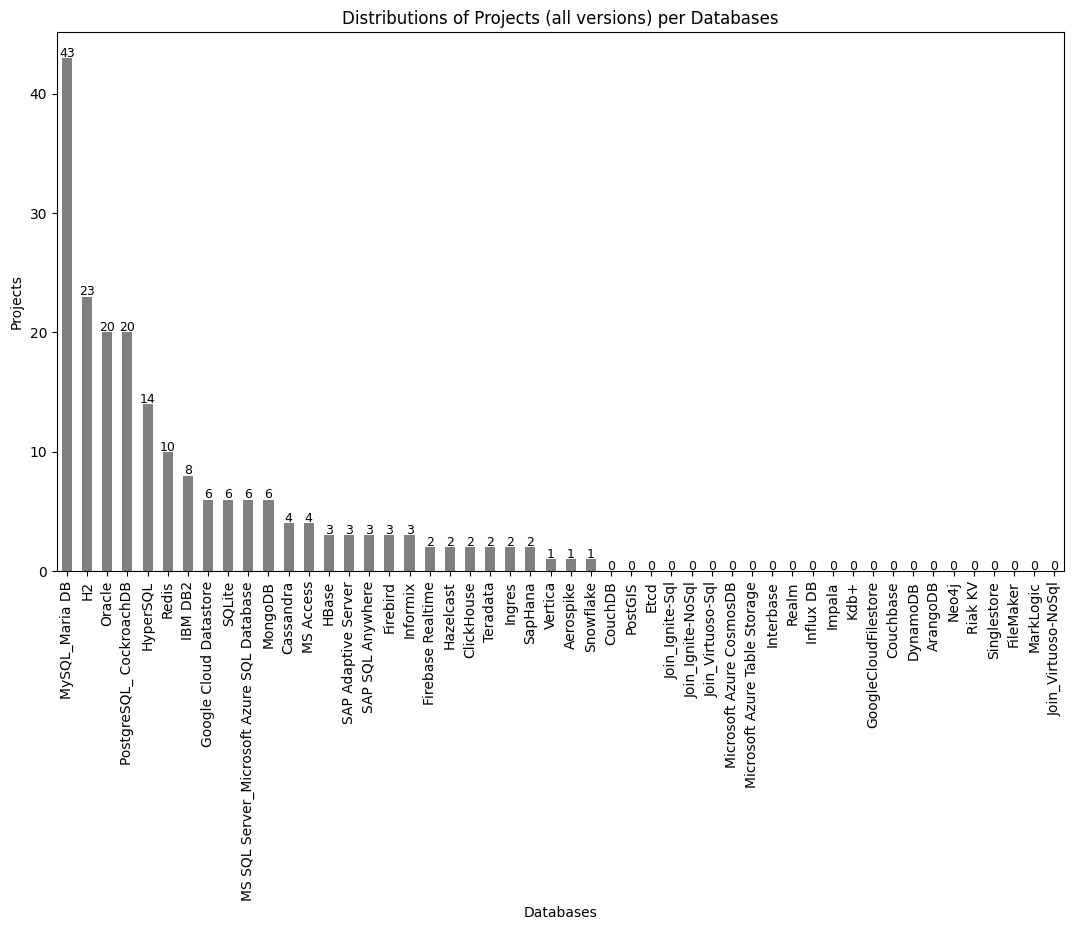

In [44]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects (all versions) per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was an indication of use in some of the versions of projects by Database

In [45]:
def less_commits(x):
   #return sum(x/10)
   return sum(x % 10 != 0 )
df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False)

MySQL_Maria DB                                69
H2                                            63
Redis                                         61
PostgreSQL_ CockroachDB                       59
Oracle                                        50
HyperSQL                                      46
MS SQL Server_Microsoft Azure SQL Database    36
SQLite                                        33
MongoDB                                       30
DynamoDB                                      22
Google Cloud Datastore                        20
IBM DB2                                       17
Hazelcast                                     17
HBase                                         16
SAP SQL Anywhere                              16
SAP Adaptive Server                           15
Cassandra                                     15
Firebase Realtime                             13
Snowflake                                      9
ClickHouse                                     8
MarkLogic           

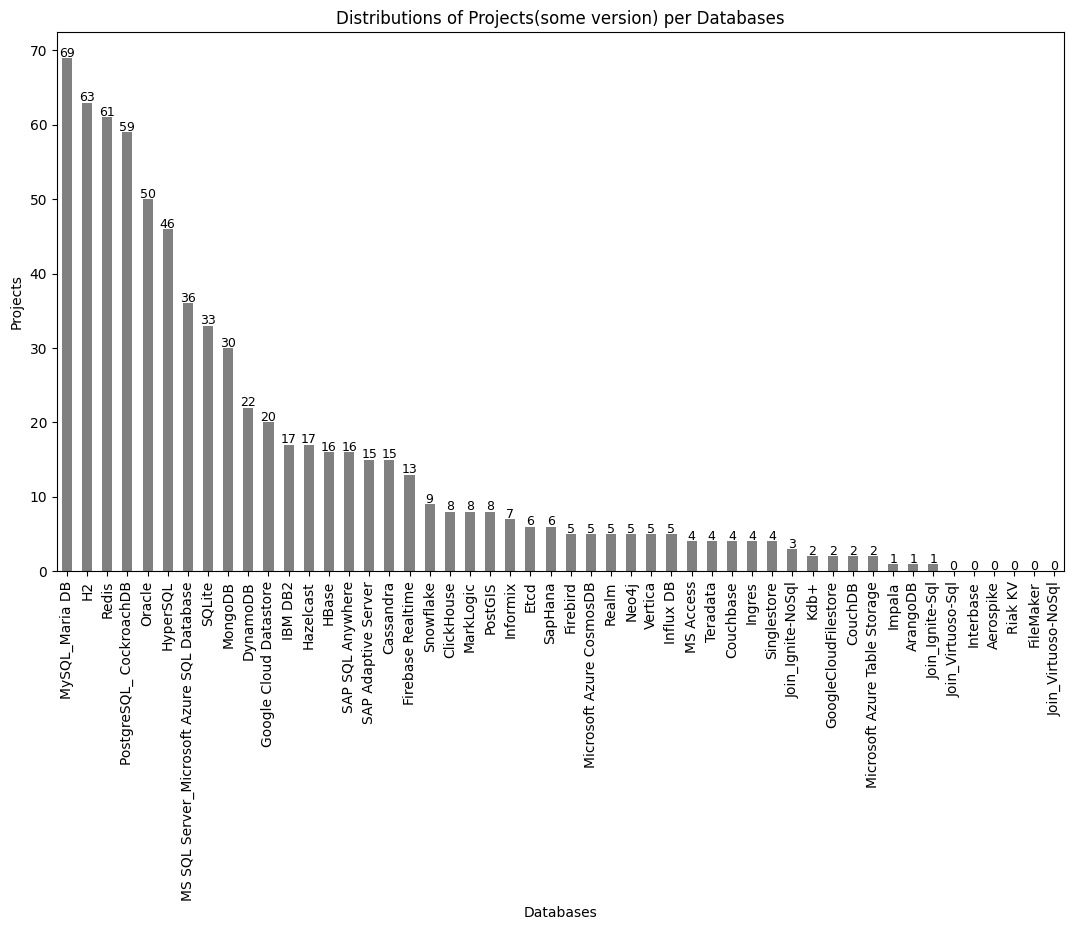

In [46]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects(some version) per Databases', color = 'gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

In [57]:
#df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db.xlsx', keep_default_na=False)
df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db (1).xlsx', keep_default_na=False)
print(df3)
#A raquel faz uma soma no final do arquivo, fazer a soma tmb.

                        Databases  Primary Model Second Model  Model  \
0                           MySQL     Relational  Multi-model    SQL   
1                              H2     Relational  Multi-model    SQL   
2                      PostgreSQL     Relational  Multi-model    SQL   
3                          Oracle     Relational  Multi-model    SQL   
4                           Redis      Key-value  Multi-model  NoSQL   
5                         Ehcache      Key-value               NoSQL   
6                         MariaDB     Relational  Multi-model    SQL   
7                   MS_SQL_Server     Relational  Multi-model    SQL   
8                          SQLite     Relational                 SQL   
9                         MongoDB       Document  Multi-model  NoSQL   
10                  Elasticsearch  Search engine  Multi-model  NoSQL   
11                        IBM_DB2     Relational  Multi-model    SQL   
12         Google Cloud Datastore       Document               N

In [58]:
df3['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
df3['Model'].replace({'NoRelational': 'Non Relational'}, regex=True, inplace=True)
#df3.set_index(list(df.columns[[4]]))
df3

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,Projects
0,MySQL,Relational,Multi-model,Relational,6,0,0,0,0,0,...,0,0,10,6,0,8,9,2,0,107
1,H2,Relational,Multi-model,Relational,9,0,0,0,0,0,...,0,0,0,0,0,7,3,0,0,74
2,PostgreSQL,Relational,Multi-model,Relational,6,0,0,0,0,0,...,0,0,10,0,0,9,3,0,0,74
3,Oracle,Relational,Multi-model,Relational,6,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,66
4,Redis,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,61
5,Ehcache,Key-value,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
6,MariaDB,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,7,7,0,0,42
7,MS_SQL_Server,Relational,Multi-model,Relational,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,37
8,SQLite,Relational,,Relational,0,0,0,0,0,0,...,0,0,0,8,0,0,4,0,0,36
9,MongoDB,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,36


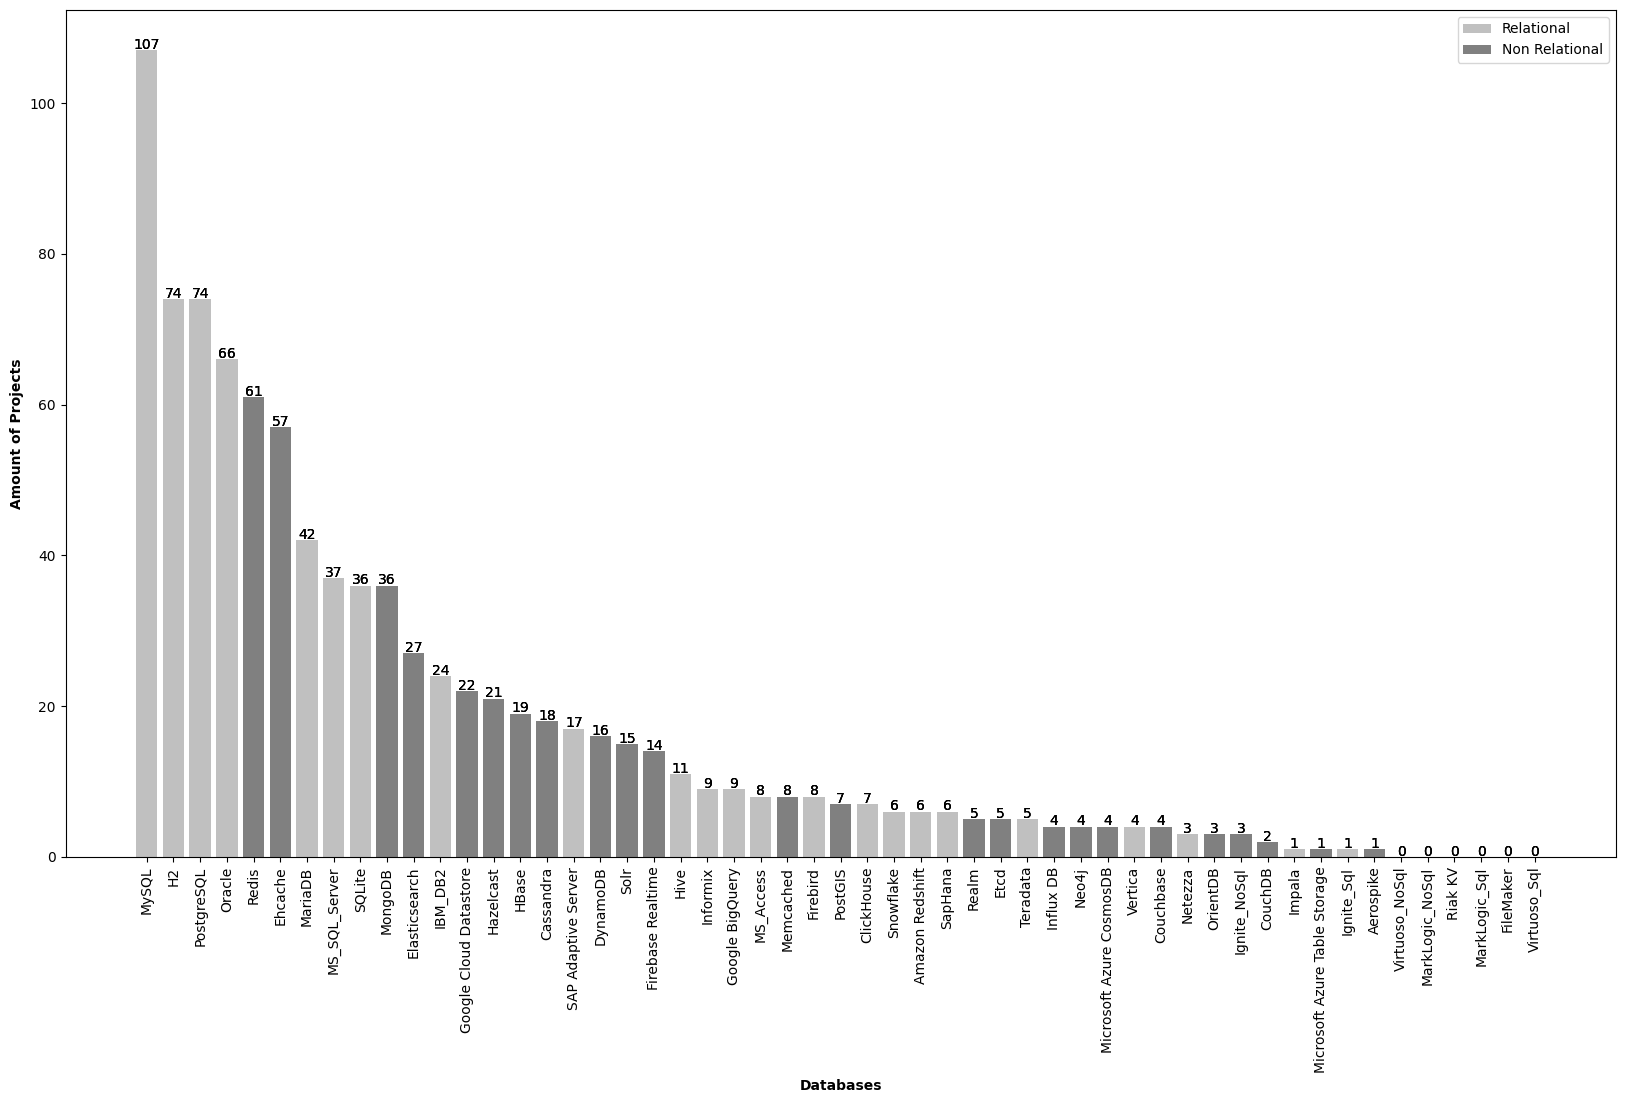

In [59]:
colors = {'Relational':'silver','Non Relational':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases", fontweight = 'bold')
plt.ylabel("Amount of Projects", fontweight = 'bold')
#plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_1076/2364344164.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']


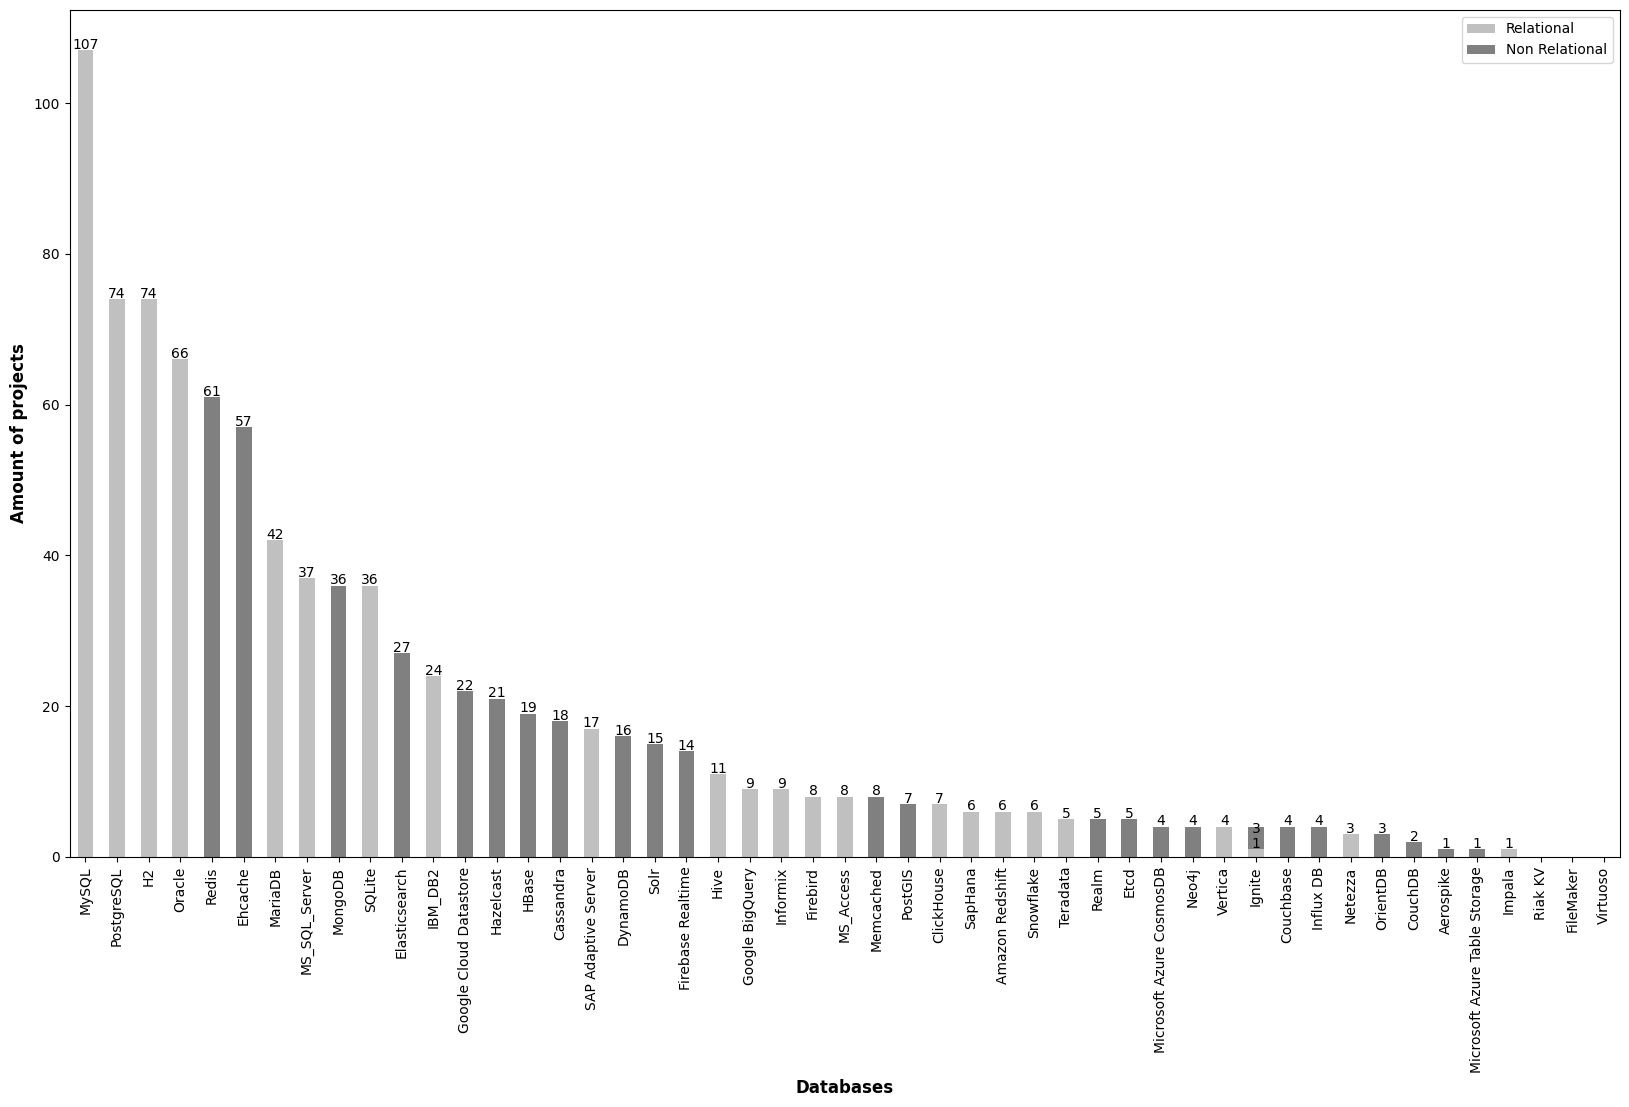

In [60]:
new_df = df3.copy()

# Supondo que seu DataFrame seja chamado df
df_grouped = new_df.groupby(['Databases'])['Projects'].sum().reset_index()

# Agrupando novamente para separar 'Relational' e 'Non_Relational'
df_grouped = new_df.groupby(['Databases', 'Model'])['Projects'].sum().reset_index()


# Criando a coluna 'Relational' e 'Non_Relational'
df_grouped['Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Relational' else 0, axis=1)
df_grouped['Non Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Non Relational' else 0, axis=1)

# Alterando o valor do Ignite, Virtuoso e Marklogic
new_row = pd.DataFrame({'Databases': ['Ignite'], 'Model': ['Multi-Model'], 'Projects': [4], 'Relational': [1], 'Non Relational': [3]})
new_row2 = pd.DataFrame({'Databases': ['Virtuoso'], 'Model': ['Multi-Model'], 'Projects': [0], 'Relational': [0], 'Non Relational': [0]})
#new_row3 = pd.DataFrame({'Databases': ['MarkLogic'], 'Model': ['Multi-Model'], 'Projects': [0], 'Relational': [0], 'Non Relational': [0]})

# Adicionando as novas linhas com Ignite, Virtuoso e MarkLogica
df_grouped = pd.concat([df_grouped,new_row], ignore_index=True)
df_grouped = pd.concat([df_grouped,new_row2], ignore_index=True)
#df_grouped = pd.concat([df_grouped,new_row3], ignore_index=True)


# Removendo o Ignite_sql, Ignite_NoSql...
df_grouped = df_grouped.drop(index = [20, 21, 28, 29, 51, 52])

df_grouped = df_grouped.reset_index(drop=True)


# Cirando um novo df para facilitar a criação do gráfico
df5 = df_grouped[['Databases', 'Relational', 'Non Relational']]

df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']

df5 = df5.sort_values(by='Amount of Projects', ascending=False)

# Definindo a paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['silver', 'gray']))

ax = df5.plot(x='Databases', y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(20,11))

# Personalizando o gráfico
ax.set_xlabel("Databases", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight = 'bold')
#Incluído para mostrar os valores das barras
ax.legend()
#ticks = ['']
#plt.xticks(y, ticks)
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    if i.get_height() != 0:
        ax.annotate(int(i.get_height()),(i.get_x() + i.get_width() / 2, i.get_height()),
        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')


plt.show()

This dataframe shows the databases that remained and those that left. It was generated from the filter run in the Pattern counter tool with the following command: $patterncounter convert -f input_sequencial_init_in_out.txt | patterncounter count --csv -n "OutX" -v X + "~OutX" -v X + "$X" -v X >> countpatterns_OutX_notOutx_Xlastslice.csv

Out X -> Filters out the BDs that have left
$X -> Filters the Bds that remained in the last slice despite removals and reinsertions
~Out X -> Filters out the DBs that have not left.


In [61]:
df4 = pd.read_excel(HISTORICAL_DB_KEEP_OUT, keep_default_na=False)
len(df4)
df4

,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [62]:
df4['Source'].replace({'OutX -v X':'Removed'}, regex=True, inplace=True)
#df4['Source'].replace({'Removed': 'Kept'}, regex=True, inplace=True)
df4

,Databases,Source,Lines
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [63]:
#df5 = df.copy()
df5 = df4.query("Source != '$X -v X'")
df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)
df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_1076/2473066294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)


,Databases,Source,Lines
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


In [64]:
df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)

df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_1076/2910628385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)


,Databases,Legend,Amount of Projects
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


In [65]:
df5 = df5.sort_values(['Amount of Projects'], ascending=[False])
#df5 = df5.groupby(['Databases','Legend']).mean().sort_values(['Amount of Projects',], ascending=[False])
df5

,Databases,Legend,Amount of Projects
36,MySQL,Kept,76
37,PostgreSQL,Kept,52
38,H2,Kept,51
39,Oracle,Kept,48
40,Redis,Kept,45
...,...,...,...
14,GoogleBigQuery,Removed,1
33,PostGIS,Removed,1
32,Teradata,Removed,1
31,Hive,Removed,1


In [66]:
#df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df5['Databases'].replace({'Join_Ignite': 'Ignite'}, regex=True, inplace=True)

This graph shows the databases that remained despite removals and reinsertions and the databases that left.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


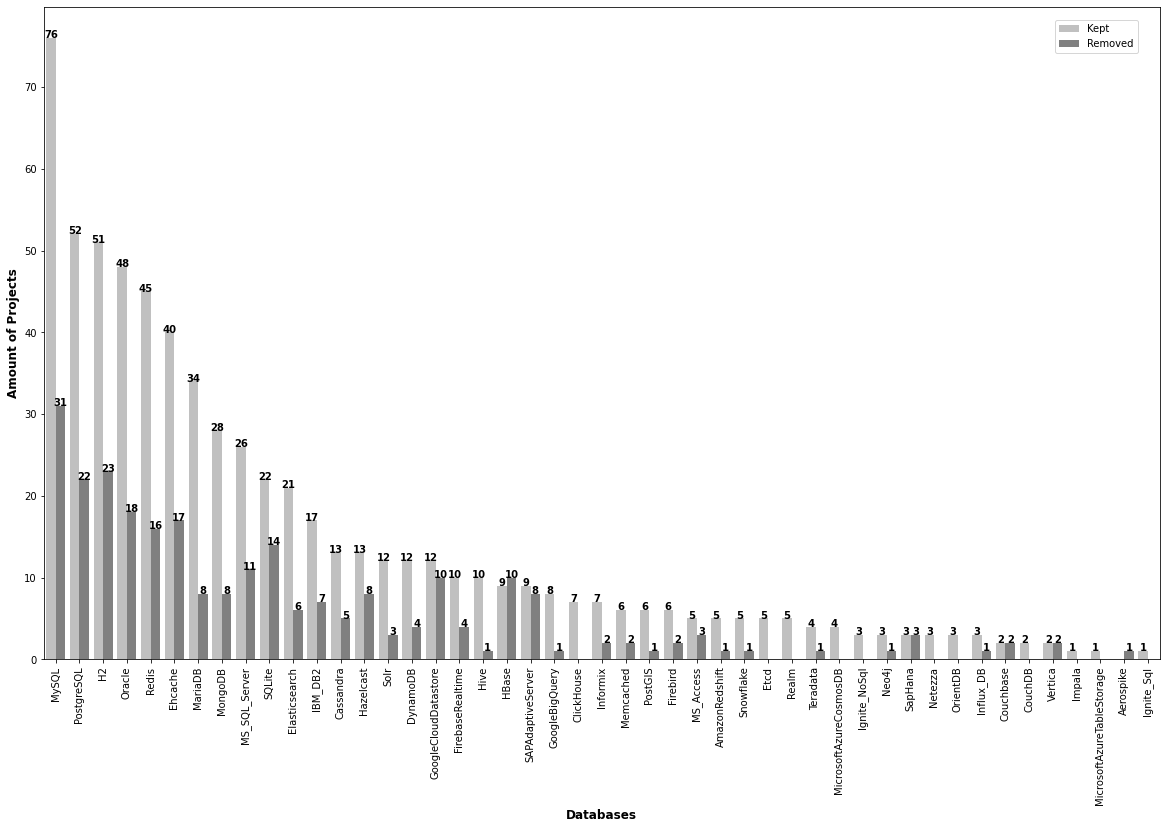

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 12))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 10, fontweight='bold')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# add axis titles
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# add values to bars
show_values_on_bars(p)

# add legend
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# rotate x-axis labels
plt.xticks(rotation=90)
#plt.yticks(range(0, 30, 10), fontsize=12)

# show plot
plt.show()